<a href="https://colab.research.google.com/github/wayoo2019/Summer-Projects/blob/master/Titanic_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content
## 1. Loadding Data
## 2. Data Exploration
- 2.1 Pivoting Data & Ploting Data (distribution)
- 2.2 Missing Value Imputation
- 2.3 Categorical Features Encoding 
- 2.4 Feature Combining & Creating
- 2.5 Features Scaling

## 3. Model Selection & Tuning
- 3.1 Model Selection
- 3.2 Model Tuning + Feature Selection



## 1.Loading Data

In [2]:
import pandas as pd
df = pd.read_csv("https://grantmlong.com/data/titanic.csv")

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Data Exploration
- 2.1 Pivoting Data & Ploting Data (distribution)
- 2.2 Missing Value Imputation
- 2.3 Categorical Features Encoding 
- 2.4 Features Scaling

##### 2.1 Pivoting Data & Ploting Data (distribution)



In [6]:
# aggregate tables with 3 features 
df[["Survived", "Sex", "Pclass"]].groupby(["Sex", "Pclass"]).agg(["mean", "count"])

Survived      
                   mean count
Sex    Pclass                
female 1       0.968085    94
       2       0.921053    76
       3       0.500000   144
male   1       0.368852   122
       2       0.157407   108
       3       0.135447   347

In [7]:
df[["Survived", "Sex", "Embarked"]].groupby(["Embarked", "Sex"]).agg(["mean", "count"])

Survived      
                     mean count
Embarked Sex                   
C        female  0.876712    73
         male    0.305263    95
Q        female  0.750000    36
         male    0.073171    41
S        female  0.689655   203
         male    0.174603   441

In [9]:
# aggregate tables with 2 features
df[["Survived", "Sex"]].groupby(["Sex"]).agg(["mean", "count"])

Survived      
            mean count
Sex                   
female  0.742038   314
male    0.188908   577

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


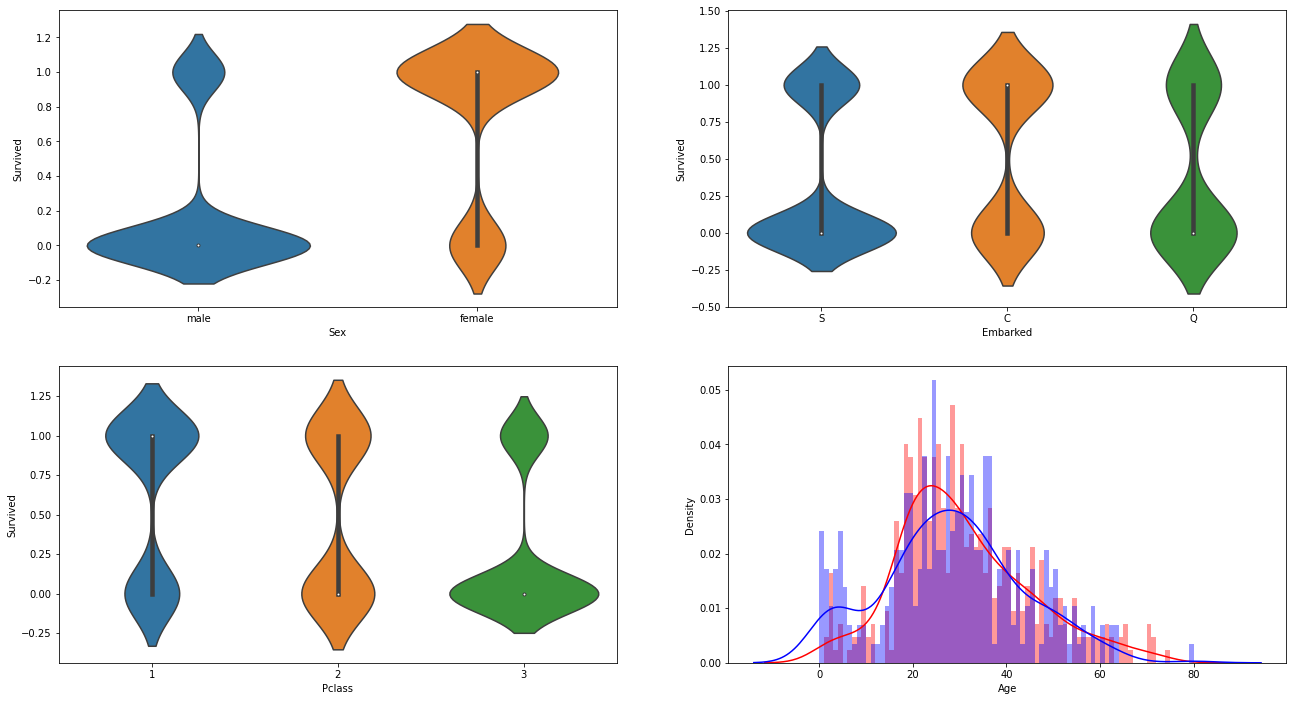

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(data, Y1, X1, X2, X3, X4):
  f, ax = plt.subplots(2, 2,figsize=[22,12])
  sns.violinplot(x = X1, y = Y1, data = data, ax = ax[0,0])
  sns.violinplot(x = X2, y = Y1, data = data, ax = ax[0,1])
  sns.violinplot(x = X3, y = Y1, data = data, ax = ax[1,0])
  sns.distplot(data[data[Y1]==0][X4].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red', ax = ax[1,1])
  sns.distplot(data[data[Y1]==1][X4].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'blue', ax = ax[1,1])


plot_violin(df, "Survived", "Sex", "Embarked", "Pclass", "Age" )

#### 2.2 Missing Value Imputation

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# check missing categorical variables
def miss_cate(data):
  miss_categorical = [var for var in data.columns if data[var].isnull().mean()>0 and (data[var].dtypes == object)]
  per = data[miss_categorical].isnull().sum()/len(df.index)
  print(miss_categorical)
  print("The missing value is: ", per)
  # data[miss_categorical[1]].value_counts().plot.bar()

miss_cate(df)

['Cabin', 'Embarked']
The missing value is:  Cabin       0.771044
Embarked    0.002245
dtype: float64


In [14]:
# check missing numerical variables
def miss_num(data):
  miss_numerical = [var for var in data.columns if data[var].isnull().mean()>0 and (data[var].dtypes == int or data[var].dtypes == float)]
  per = data[miss_numerical].isnull().sum()/len(df.index)
  print(miss_numerical)
  print("The missing value is: ", per)
  # print(type(miss_numerical))

miss_num(df)


['Age']
The missing value is:  Age    0.198653
dtype: float64


In [16]:
# Impute missing value for numerical variables
from sklearn.impute import SimpleImputer
def impute_simple(data, feature1, strategy1): # strategy = median, mean, most frequent, constant
  imputer1 = SimpleImputer(missing_values=np.nan, strategy=strategy1, add_indicator=True)
  data[feature1] = imputer1.fit_transform(data[[feature1]])

  return df

impute_simple(df, "Age", "median")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
# impute categorical missing value
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
# assign specific value for these two missing value based on passager's name

df.at[61, "Embarked"] = "C"  # assign France based on name origin
df.at[829, "Embarked"] = "S" # assign England based on name origin

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### 2.3 Categorical Features Encoding

In [19]:

# encode binary categorical variable 
from sklearn.preprocessing import LabelEncoder
def ordinal(data, feature1, feature1_1):
  lec = LabelEncoder()
  data[feature1_1] = lec.fit_transform(np.ravel(data[[feature1]]))
  return data

ordinal(df, "Sex", "Sex_code")
ordinal(df, "Embarked", "Embarked_code")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Embarked_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0


In [20]:
#encode categorical data with OneHotEncoder
pd.options.display.max_columns = None # make sure new columns will be shown
from sklearn.preprocessing import OneHotEncoder
def ohec(data, feature1):
  ohec = OneHotEncoder()
  flist = data[feature1].unique() 
  new_col = [] # create new columns name list 
  for f in flist:
    cn = feature1 + "_" + f
    new_col.append(cn)
  data[new_col] = ohec.fit_transform(data[[feature1]]).toarray()
  data[new_col] = data[new_col].astype(int)
  return data

ohec(df, "Embarked")



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Embarked_code,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,2,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,2,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,1,0,0


#### 2.4 Feature Combining & Creating

In [23]:
# combine SibSp + Parch -> Family, add has_cabin
df["Family"] = df["SibSp"] + df["Parch"]
# df["Alone"] = 0 
# df["Alone"].loc[df["Family"]>0] = 1 # if family number > 0, not alone/0

np.where(df["Family"]>0, df["Alone"]==1, df["Alone"]==0) 

# feature creating - has_cabin
df["has_cabin"] = 0 
df.loc[df.Cabin.isna(), "has_cabin"] = 1
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Embarked_code,Embarked_S,Embarked_C,Embarked_Q,Family,Alone,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,0,1,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,0,0,1,0,0,1


In [24]:
# Add title as a variable

df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
title_names = (df['Title'].value_counts() < 10)
df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
ordinal(df, "Title", "Title_code")
print(df['Title'].value_counts())


ohec(df, "Title")
df.head(5)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Embarked_code,Embarked_S,Embarked_C,Embarked_Q,Family,Alone,has_cabin,Title,Title_code,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Misc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,0,1,1,1,1,Mr,3,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,1,1,0,Mrs,4,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0,1,0,0,1,Miss,2,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1,1,1,0,Mrs,4,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,0,0,1,0,0,1,Mr,3,0,0,0,1,0


In [34]:
np.triu(np.ones_like(df_train_1.corr(), dtype=np.bool))


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

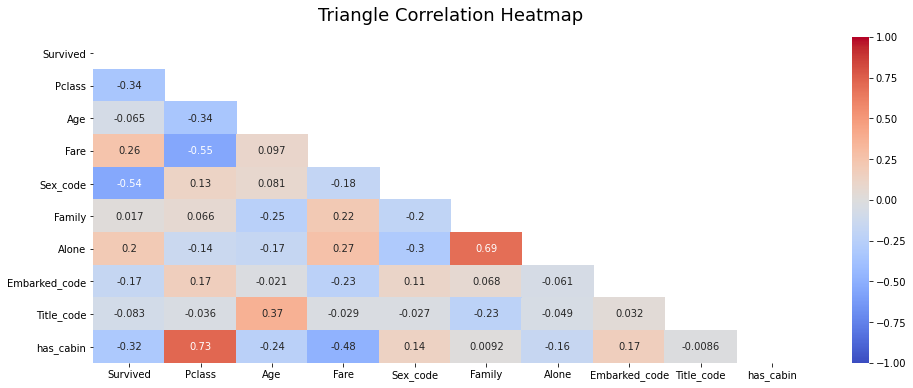

In [40]:
# Triangle Correlation Heatmap:
cols_1= ["Survived", "Pclass","Age", "Fare", "Sex_code", "Family", "Alone", "Embarked_code", "Title_code", "has_cabin"]
df_train_1 = df[cols_1]

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train_1.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train_1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# reference: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [37]:
# Define column list for prediction
cols = ["Survived", "Pclass","Age", "Fare", "Sex_code", "Family", "Alone", "Embarked_S", "Embarked_C", "Embarked_Q", "Title_Mr", "Title_Mrs", "Title_Miss", "Title_Master", "Title_Misc"] # y and X name list
target = ["Survived"] # y
features = ["Pclass","Age", "Fare", "Sex_code", "Family", "Alone", "Embarked_S", "Embarked_C", "Embarked_Q", "Title_Mr", "Title_Mrs", "Title_Miss", "Title_Master", "Title_Misc"] # X

npX = df[features]
npy =  df["Survived"]

df_train = df[cols]



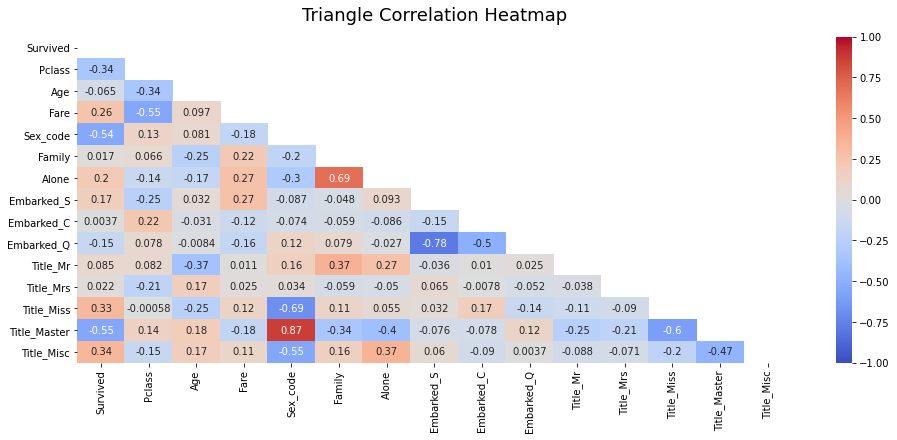

In [39]:

# corr = df_train.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)


plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#### 2.5 Features Scaling

In [46]:
# data scaling - standarscaler
from sklearn.preprocessing import StandardScaler
# def stand_scal(data):
#   sc = StandardScaler()
#   data_scaled = pd.DataFrame(sc.fit_transform(data), columns=data.columns)
#   return data_scaled

# stand_scal(npX)

sc = StandardScaler()

npX_scaled = pd.DataFrame(sc.fit_transform(npX), columns=npX.columns) #keeps columns name after scaling
npX_scaled

,Pclass,Age,Fare,Sex_code,Family,Alone,Embarked_S,Embarked_C,Embarked_Q,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Misc
0,0.827377,-0.565736,-0.502445,0.737695,0.059160,1.231645,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,-0.506655,0.850532,-0.403962
1,-1.566107,0.663861,0.786845,-1.355574,0.059160,1.231645,2.066928,-0.307562,-1.619244,-0.216803,-0.176777,-0.506655,-1.175735,2.475480
2,0.827377,-0.258337,-0.488854,-1.355574,-0.560975,-0.811922,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,1.973729,-1.175735,-0.403962
3,-1.566107,0.433312,0.420730,-1.355574,0.059160,1.231645,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,-0.506655,-1.175735,2.475480
4,0.827377,0.433312,-0.486337,0.737695,-0.560975,-0.811922,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,-0.506655,0.850532,-0.403962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.386671,0.737695,-0.560975,-0.811922,-0.483810,-0.307562,0.617572,-0.216803,5.656854,-0.506655,-1.175735,-0.403962
887,-1.566107,-0.796286,-0.044381,-1.355574,-0.560975,-0.811922,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,1.973729,-1.175735,-0.403962
888,0.827377,-0.104637,-0.176263,-1.355574,1.299429,1.231645,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,1.973729,-1.175735,-0.403962
889,-1.566107,-0.258337,-0.044381,0.737695,-0.560975,-0.811922,2.066928,-0.307562,-1.619244,-0.216803,-0.176777,-0.506655,0.850532,-0.403962


In [48]:
npX_scaled

,Pclass,Age,Fare,Sex_code,Family,Alone,Embarked_S,Embarked_C,Embarked_Q,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Misc
0,0.827377,-0.565736,-0.502445,0.737695,0.059160,1.231645,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,-0.506655,0.850532,-0.403962
1,-1.566107,0.663861,0.786845,-1.355574,0.059160,1.231645,2.066928,-0.307562,-1.619244,-0.216803,-0.176777,-0.506655,-1.175735,2.475480
2,0.827377,-0.258337,-0.488854,-1.355574,-0.560975,-0.811922,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,1.973729,-1.175735,-0.403962
3,-1.566107,0.433312,0.420730,-1.355574,0.059160,1.231645,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,-0.506655,-1.175735,2.475480
4,0.827377,0.433312,-0.486337,0.737695,-0.560975,-0.811922,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,-0.506655,0.850532,-0.403962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.386671,0.737695,-0.560975,-0.811922,-0.483810,-0.307562,0.617572,-0.216803,5.656854,-0.506655,-1.175735,-0.403962
887,-1.566107,-0.796286,-0.044381,-1.355574,-0.560975,-0.811922,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,1.973729,-1.175735,-0.403962
888,0.827377,-0.104637,-0.176263,-1.355574,1.299429,1.231645,-0.483810,-0.307562,0.617572,-0.216803,-0.176777,1.973729,-1.175735,-0.403962
889,-1.566107,-0.258337,-0.044381,0.737695,-0.560975,-0.811922,2.066928,-0.307562,-1.619244,-0.216803,-0.176777,-0.506655,0.850532,-0.403962


## 3. Model Selection & Tuning
- 3.1 Model Selection
- 3.2 Model Tuning + Feature Selection

#### 3.1 Model Selection

#####3.1.1 Use "**cross_val_score**" for model selection

In [26]:
# Load classification models
# reference https://www.kaggle.com/l3r4nd/titanic-prediction-with-svm
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 
from sklearn import feature_selection

clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
# clf_lr = LogisticRegression(solver='lbfgs', max_iter=1000) # why V1 version does not require this change
clf_svm = SVC()
clf_knn = KNeighborsClassifier()


def model_score(X, y):
  Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM', 'KNN']
  scores = []
  models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm, clf_knn]

  cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

  for model in models:
    score = cross_val_score(model, X, y, scoring="accuracy", cv=cv_split).mean()
    scores.append(score)

  results = pd.DataFrame(scores, index=Classifiers, columns=["Score"]).sort_values(by = 'Score', ascending = False)

  print(results)

model_score(npX_scaled, npy)

                       Score
XGBoost             0.835075
SVM                 0.830597
LogisticRegression  0.829104
KNN                 0.823134
AdaBoost            0.814179
RandomForest        0.813060
Bagging             0.810821
ExtraTrees          0.793284
DecisionTree        0.779851


##### 3.1.2 Use "**model_selection.cross_validate**" for model selection

> Indented block



In [27]:
# reference: https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook#Step-5:-Model-Data

#Machine Learning Algorithm (MLA) Selection and Initialization
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(max_iter=-1),
    svm.NuSVC(max_iter=-1),
    svm.LinearSVC(max_iter=-1),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
  
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params()) 
    # For use with the model_selection module, an estimator must support the base.clone function to replicate an estimator.
    # https://scikit-learn.org/stable/developers/develop.html

    cv_results = model_selection.cross_validate(alg, npX_scaled, npy, cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean() 

    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    # #save MLA predictions - see section 6 for usage
    # alg.fit(npX_scaled, npy)
    # MLA_predict[MLA_name] = alg.predict(npX_scaled)
    
    row_index+=1

#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict







/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.917228,0.835448,0.0551696,0.10307
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.894944,0.835075,0.0767097,0.0421172
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.847004,0.830597,0.0436997,0.0117543
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.833146,0.829478,0.0553058,0.00533526
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.832772,0.829478,0.0532276,0.00353053
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.832022,0.826119,0.0515898,0.2339
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.864981,0.823134,0.0724073,0.0024832
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.871348,0.822388,0.0501113,0.249856
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.831648,0.822015,0.0827223,0.0134342
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.969288,0.818657,0.0525524,0.0247431


#### 3.2 Model Tuning + Feature Selection

In [28]:
# Tune Moddel - Decision Tree

#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, npX_scaled, npy, cv  = cv_split, return_train_score=True)
dtree.fit(npX_scaled, npy)

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

#print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(npX_scaled, npy)

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)



BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 98.71
BEFORE DT Test w/bin score mean: 78.28
BEFORE DT Test w/bin score 3*std: +/- 5.46
BEFORE DT Test w/bin set score min: 74.63
----------
AFTER DT Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'random'}
AFTER DT Training w/bin score mean: 88.65
AFTER DT Test w/bin score mean: 87.02
AFTER DT Test w/bin score 3*std: +/- 6.01
----------


[[547   2]
 [ 14 328]] 

Accuracy: 0.982
Precision: 0.994
Recall: 0.959


<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')>

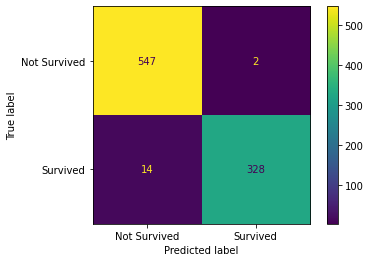

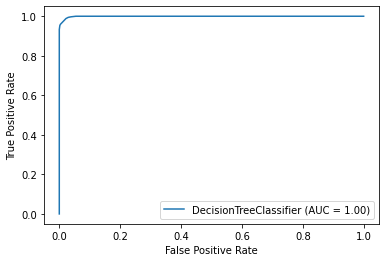

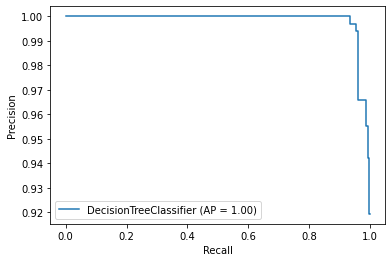

In [54]:
# Confusion matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, plot_roc_curve, plot_precision_recall_curve

dtree = dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(npX_scaled, npy)
dtree_predict_1 = dtree.predict(npX_scaled)

print(confusion_matrix(npy, dtree_predict_1), '\n')
print('Accuracy: %0.3f' % accuracy_score(npy, dtree_predict_1))
print('Precision: %0.3f' % precision_score(npy, dtree_predict_1))
print('Recall: %0.3f' % recall_score(npy, dtree_predict_1))

plot_confusion_matrix(dtree, npX_scaled, npy, display_labels=['Not Survived', 'Survived'], values_format='d')
plot_roc_curve(dtree, npX_scaled, npy)
plot_precision_recall_curve(dtree, npX_scaled, npy)
dtree.get_params

[[522  27]
 [121 221]] 

Accuracy: 0.834
Precision: 0.891
Recall: 0.646


<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')>

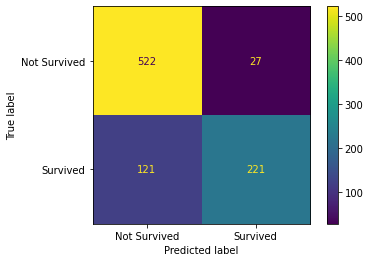

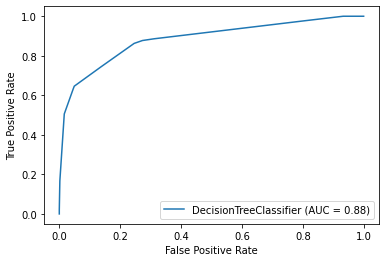

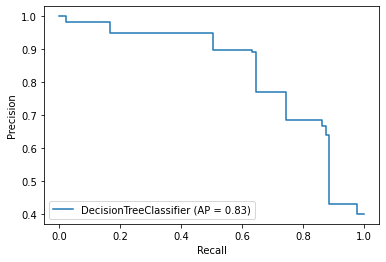

In [61]:
tuned_dtree = tree.DecisionTreeClassifier(random_state = 0, criterion="entropy", max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter="random")
tuned_dtree.fit(npX_scaled, npy)
tuned_dtree_predict = tuned_dtree.predict(npX_scaled)

print(confusion_matrix(npy, tuned_dtree_predict), '\n')
print('Accuracy: %0.3f' % accuracy_score(npy, tuned_dtree_predict))
print('Precision: %0.3f' % precision_score(npy, tuned_dtree_predict))
print('Recall: %0.3f' % recall_score(npy, tuned_dtree_predict))

plot_confusion_matrix(tuned_dtree, npX_scaled, npy, display_labels=['Not Survived', 'Survived'], values_format='d')
plot_roc_curve(tuned_dtree, npX_scaled, npy)
plot_precision_recall_curve(tuned_dtree, npX_scaled, npy)
tuned_dtree.get_params

In [ ]:
# 

In [29]:
# Feature selection

#base model
print('BEFORE DT RFE Training Shape Old: ', npX_scaled.shape) 
print('BEFORE DT RFE Training Columns Old: ', npX_scaled.columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)


#feature selection
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(npX_scaled, npy)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = npX_scaled.columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, npX_scaled[X_rfe], npy, cv  = cv_split, return_train_score=True)

#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', npX_scaled[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
rfe_tune_model.fit(npX_scaled[X_rfe], npy)

#print(rfe_tune_model.cv_results_.keys())
#print(rfe_tune_model.cv_results_['params'])
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (891, 14)
BEFORE DT RFE Training Columns Old:  ['Pclass' 'Age' 'Fare' 'Sex_code' 'Family' 'Alone' 'Embarked_S'
 'Embarked_C' 'Embarked_Q' 'Title_Mr' 'Title_Mrs' 'Title_Miss'
 'Title_Master' 'Title_Misc']
BEFORE DT RFE Training w/bin score mean: 98.71
BEFORE DT RFE Test w/bin score mean: 78.28
BEFORE DT RFE Test w/bin score 3*std: +/- 5.46
----------
AFTER DT RFE Training Shape New:  (891, 2)
AFTER DT RFE Training Columns New:  ['Fare' 'Title_Master']
AFTER DT RFE Training w/bin score mean: 90.84
AFTER DT RFE Test w/bin score mean: 79.48
AFTER DT RFE Test w/bin score 3*std: +/- 4.90
----------
AFTER DT RFE Tuned Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 0.05, 'random_state': 0, 'splitter': 'best'}
AFTER DT RFE Tuned Training w/bin score mean: 82.34
AFTER DT RFE Tuned Test w/bin score mean: 80.32
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 5.23
----------
